# San Francisco Salary Analysis & Prediction

<p>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from collections import defaultdict
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from statsmodels.formula.api import ols
from scipy.stats import f

### 1) Dataset Description

We use the [SanFrancisco_salary_3years](https://www.kaggle.com/datasets/igorkarayman/sanfrancisco-salary-3-years/code?datasetId=2545639&sortBy=voteCount) from Kaggle. 
It contains the salary information in San Francisco from 2012 to 2014. <p>
We download the csv type of file of this dataset. Let's load it to our notebook and take a look at the general information of this dataset first.

In [166]:
# import dataset & general information
df = pd.read_csv("SanFrancisco_salary (csv).csv")

# dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111881 entries, 0 to 111880
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        111881 non-null  int64  
 1   Id                111881 non-null  int64  
 2   EmployeeName      111881 non-null  object 
 3   JobTitle          111881 non-null  object 
 4   BasePay           111881 non-null  float64
 5   OvertimePay       111881 non-null  float64
 6   OtherPay          111881 non-null  float64
 7   Benefits          111881 non-null  float64
 8   TotalPay          111881 non-null  float64
 9   TotalPayBenefits  111881 non-null  float64
 10  Year              111881 non-null  int64  
 11  Department        111881 non-null  object 
 12  Department_ML     111881 non-null  int64  
dtypes: float64(6), int64(4), object(3)
memory usage: 11.1+ MB


From the information summary above, we find that there are 111881 rows of records in this dataset, with 12 columns of features. <p>
Below are the descriptions of each feature. <p>

In [14]:
pd.read_csv("descriptions.csv")

,Feature Name,Description
0,Id,the unique index of each records
1,EmployeeName,the name of the employ
2,JobTitle,the title of the job
3,BasePay,fundamental payment
4,OvertimePay,the payment when working overtime
5,OtherPay,other payment
6,Benefits,the benefits payment
7,TotalPay,the total amount of payment
8,TotalPayBenefits,the total amount of benefits
9,Year,the year of the records


### 2) Interesting Problems

By roughly observing the dataset, some questions arose in our minds. As this dataset not only contains the information about different types of salary, but also has information about the employee's department and years. <p>
After disscussing thoroughly, we list some interesting problems below:

- What are the statistical features and distribution of different salary types? <p>
- Is there any correlations between these different salary types? <p>
- How can we build a model to predict the 'TotalPay'? <br>
What model should we use? And what features we can use to make the prediction?

### 3) Data Preprocess & Cleaning

Now we need to preprocess the dataset, making it more clean and suitable for our later analysis works. <p>

##### 3.1 Delete unnecessary columns
'Unnamed: 0' and 'Id' are features unrelated to our analysis. We delete these columns from the original dataset.

In [230]:
# remove features that we don't need
del(df['Unnamed: 0'])
del(df['Id'])

##### 3.2 Drop null values
We need to check if our original dataset has any null value. We will drop the null value if there is any.

In [167]:
# check null value
df.isnull().sum()

Unnamed: 0          0
Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Department          0
Department_ML       0
dtype: int64

##### 3.3 Replace the negative numbers
There are 6 different types of payments in the dataset. We assume that the payment number shouldn't be negative according to common sense. Therefore we need to find all the negative numbers in the dataset. <p>
We see these negative numbers as error and set them all to zero.

In [ ]:
# negative number in BasePay, OvertimePay, OtherPay, Benefits, TotalPay, TotalPayBenefits
# replace negative number with 0.0
PayList = ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits']
a_neg = 0
for i in PayList:
    for j in range(len(df[i])):
        if df[i][j] < 0:
            a_neg += 1
            df[i][j] = 0.0
print(a_neg)

### 4) Visualization

##### 4.1 Statistical distribution of different pay types

A boxplot is perfect to directly see the distribution of a set of data. <br>
We make the boxplot first, comparing six different pay types in one chart.

<AxesSubplot:>

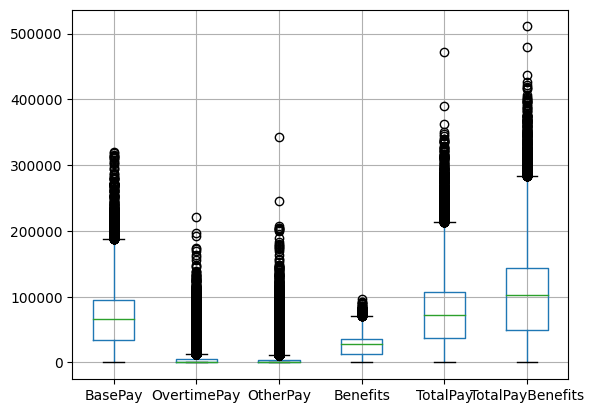

In [169]:
# boxplot of different payment types
df.boxplot(column=PayList)

To make the comparison more detailed, we calculate 5 different statistical features of each pay type, including the max, min, mean, median and standard diviation number.

In [170]:
# max, min, mean, median, std of different payment types
stat_data = defaultdict(list)
for i in PayList:
    stat_data[i].append(df[i].max())
    stat_data[i].append(df[i].min())
    stat_data[i].append(df[i].mean())
    stat_data[i].append(df[i].median())
    stat_data[i].append(df[i].std())
stat_df = pd.DataFrame(stat_data, index=['Max','Min','Mean','Median','Std'], columns=PayList, dtype=float)
stat_df.round(1)

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits
Max,319275.0,220909.5,342802.6,96570.7,471952.6,510732.7
Min,0.0,0.0,0.0,0.0,0.0,0.0
Mean,67208.5,5266.5,3655.1,25114.7,76130.1,101244.8
Median,65547.0,0.0,820.8,28698.5,72630.7,101970.6
Std,43417.7,11764.8,8038.8,15372.7,51269.8,65248.9


##### 4.2 Correlations between different pay types

As we want to see if there's any correlations between different pay types. We draw a scatter plot between each two pay types, so that we can have the a view by looking at the trends of these plots.

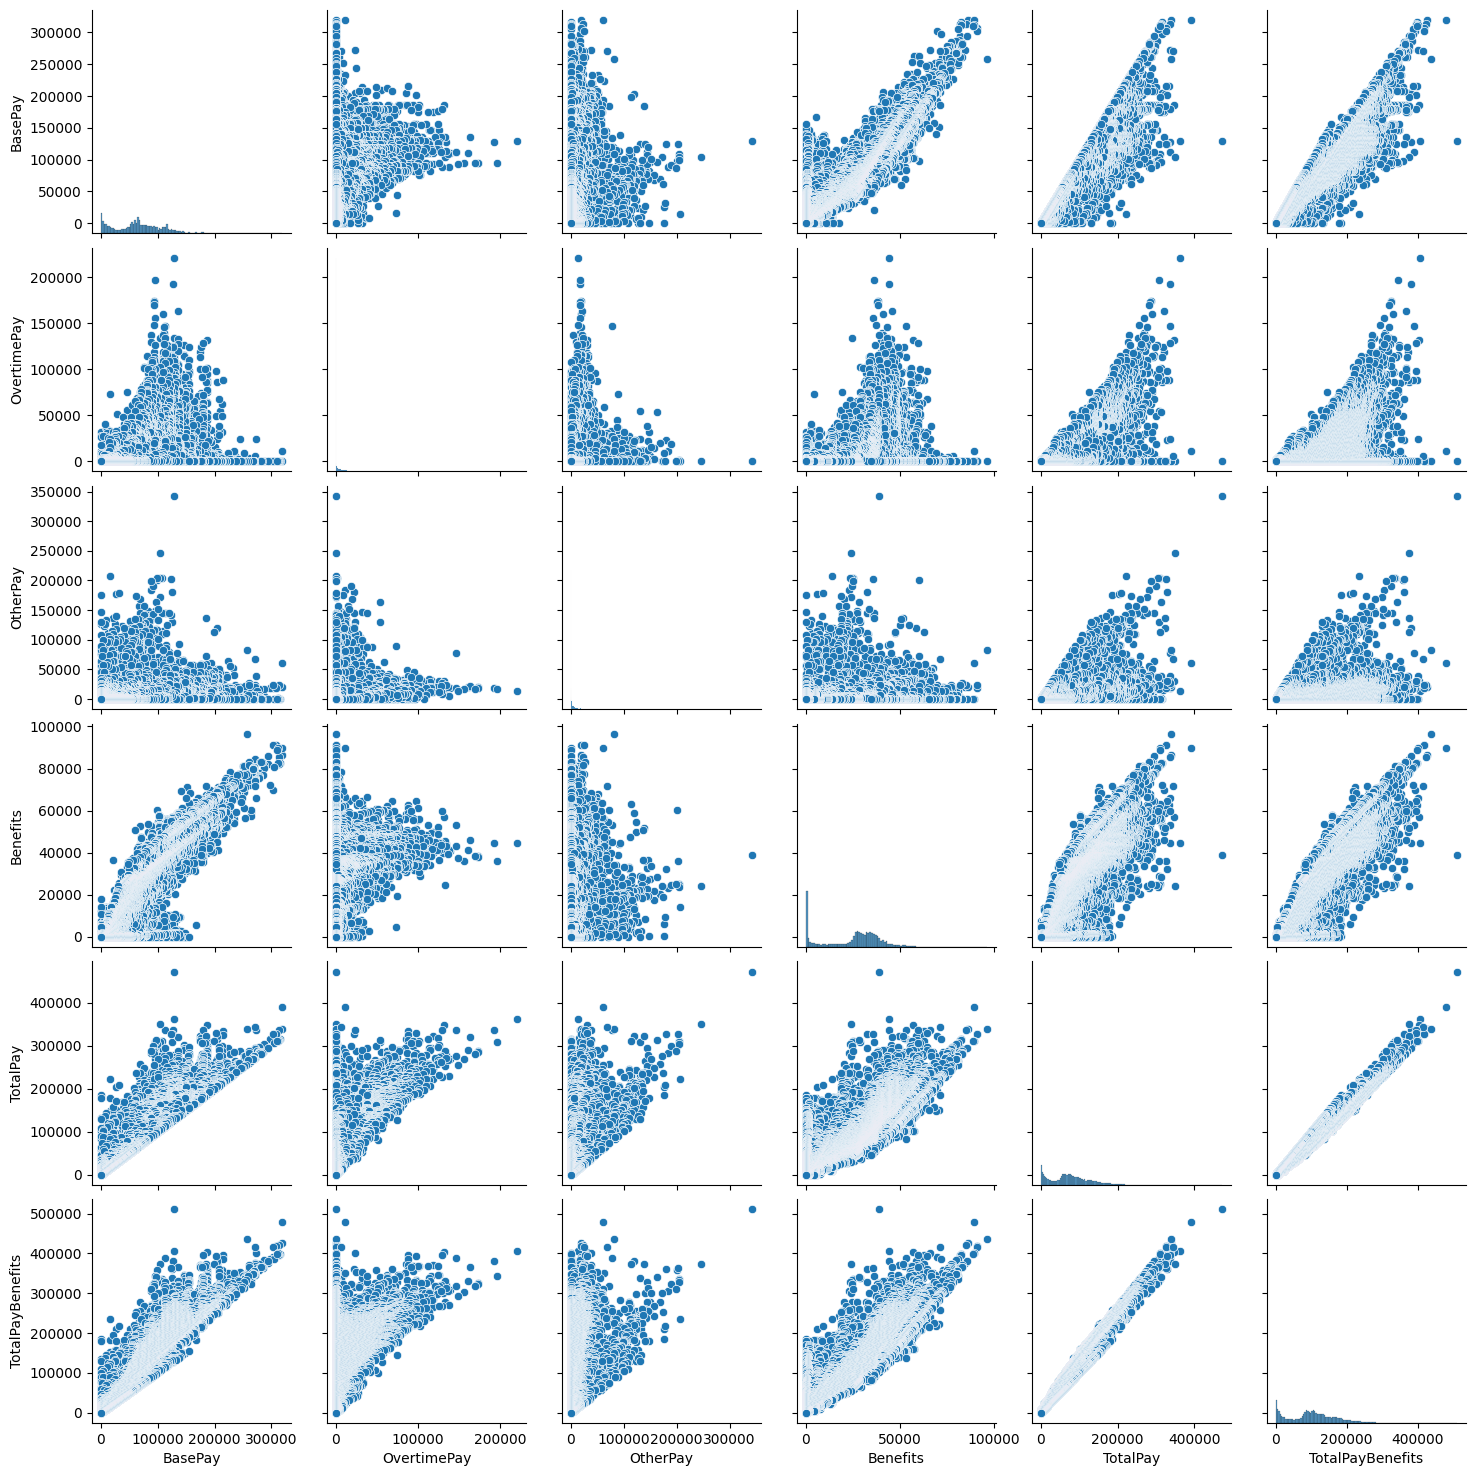

In [171]:
sns.pairplot(df[PayList])

We then calculate the correlation number between them to be more exact. <br>
And we make a heatmap to visualize the result. If two pay types has higher number of correlation, then the color would be darker.

<AxesSubplot:>

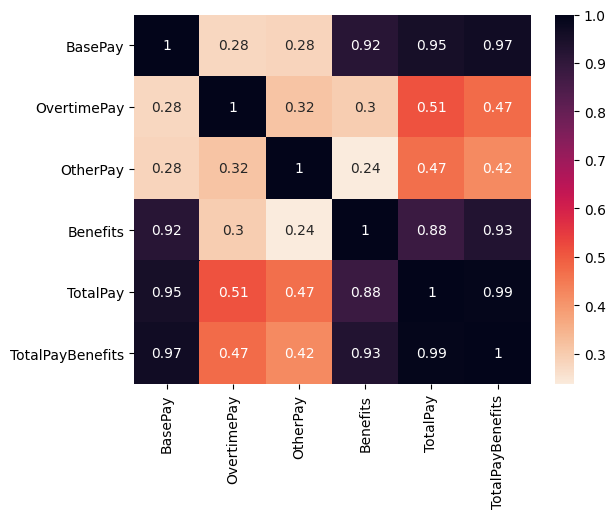

In [172]:
df_pay = df[PayList]
corr_data = df_pay.corr()
sns.heatmap(corr_data, annot=True ,cmap='rocket_r')

### 5) TotalPay Prediction

We are more interested in predicting the TotalPay number, as it has more practical meanings in the reality. <p>

We need to define the features that we want to use to predict the TotalPay. <br>
According to the data description, we focus on these four features, BasePay, Benefits, TotalPayBenefits and Department_ML. <p>

However, as we can see from the correlation numbers in the previous section, there's a strong correlation between BasePay, Benefits and TotalPayBenefits. It can cause to multicollinearity and affect the regression results. <br>
In order to avoid it, we use Variance Inflation Factor (VIF) to measure the amount of multicollinearity.

In [217]:
def vif(df, col_i):
    cols = list(df.columns)
    cols.remove(col_i)
    cols_noti = cols
    formula = col_i + '~' + '+'.join(cols_noti)
    r2 = ols(formula, df).fit().rsquared
    return 1. / (1. - r2)

test = df[['BasePay', 'Benefits', 'TotalPayBenefits', 'Department_ML']]
for i in test.columns:
    print(i, '\t', vif(test, i))

BasePay 	 16.138569360757515
Benefits 	 7.784368918119935
TotalPayBenefits 	 18.44834298032445
Department_ML 	 1.0236928988280862


According to James et al. 2013, 
> A VIF less than 5 indicates a low correlation of that predictor with other predictors. <br>
> A VIF between 5 and 10 indicates a moderate correlation. <br>
> A VIF larger than 10 are a sign for high, not tolerable correlation of model predictors. 
<p>
Therefore, BasePay, Benefits and TotalPayBenefits are not tolerable correlation of model predictors. We can only choose the smallest among the three for our model, which is Benefits. <br>
Department_ML has a low VIF, and can be chosen to our prediction model.

In [231]:
X = df.loc[:,('Benefits','Department_ML')]
y = df.loc[:, 'TotalPay']

Then we randomly seperate the original dataset into train and test, with the test_size 10% to the original size.

In [232]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1,random_state=100)
print ('X_train.shape={}n y_train.shape ={}n X_test.shape={}n,  y_test.shape={}'.format(X_train.shape,y_train.shape, X_test.shape,y_test.shape))

X_train.shape=(100692, 2)n y_train.shape =(100692,)n X_test.shape=(11189, 2)n,  y_test.shape=(11189,)


The model that we choose to make the prediction is Multiple Linear Regression. Its formula is shown below. <p>
$$ Y = \beta_0 + \beta_1 x_1 + \cdots + \beta_p x_p + \epsilon $$
We use the train dataset to train this multiple linear regression model.

In [221]:
model = LinearRegression().fit(X_train, y_train)
print(model.coef_)
print(model.intercept_)

[    2.95080064 -1520.37347123]
5747.193202396287


The coeffient of Benefits is 2.95080064, and of Department_ML is -1520.37347123. <br>
The interception is 5747.193202396287. <p>
We then use the trained model on our test set to make the prediction on TotalPay.

In [222]:
y_pred = model.predict(X_test)

To visualize the result of our prediction, we make another scatter plot to compare the original number in the test set and our prediction. <br>
The original test set is blue labeled. And the prediction is green labeled.

<AxesSubplot:xlabel='index', ylabel='predict'>

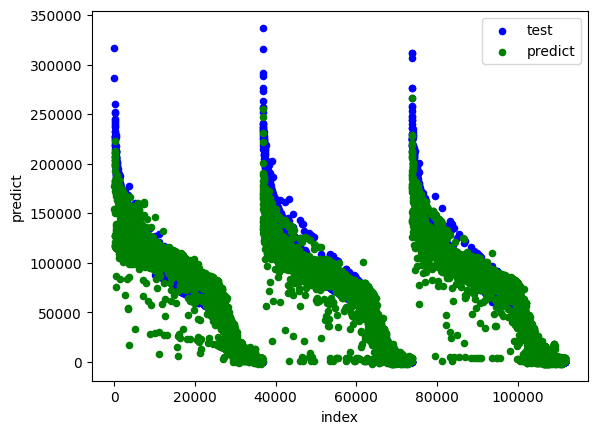

In [229]:
yt = {'index':y_test.index, 'test':y_test.values, 'predict':y_pred}
dyt = pd.DataFrame(yt)
ax = dyt.plot.scatter(x='index', y='test', color='b', label='test')
dyt.plot.scatter(x='index', y='predict', color='g', label='predict', ax=ax)

Now we need to check how well our model perform by checking the if the prediction result can pass some statistical tests. <p>

The first test we use is the F-test. It is a one-way analysis of variance (ANOVA) is used to assess whether the expected values of a quantitative variable within several pre-defined groups differ from each other. It's formula is shown below.
$$ \sum_{i=1}^K n_i (\bar Y_i - \bar Y)^2 / (K-1) $$

In [224]:
ybar = y_train.values.mean()
p = model.n_features_in_    # number of features
n = y_train.shape[0]        # number records of train set
RSS = np.sum((y_pred - ybar) ** 2)
ESS = np.sum(model._residues ** 2)
F = (RSS/p) / (ESS/(n-p-1))
F

3.5241130730204483e-10

After calculating the F number of our data. We compare it with the F_Theory number, with a commonly used interval probability of 95%. <p>
Our F number is larger than the F_Theory number. Therefore, we can reject the null hypothesis. The sample averages are significantly different from each other.

In [234]:
# F_Theory
print(f.ppf(q=0.95, dfn=p, dfd=n-p-1))

2.995821405337498


Then we use T-test to check the significance of individual regression coefficients in our multiple linear regression model. <br>
This time, we utilize the python package from statsmodels.<p> 
The model we use is the Ordinary Least Squares regression (OLS). <br>
It is a common technique for estimating coefficients of linear regression equations which describe the relationship between one or more independent quantitative variables and a dependent variable (simple or multiple linear regression). <p>
After using the same way to split the train and test set. We build a same regression model by using the function of ols on the train set. 

In [227]:
train, test = train_test_split(df, test_size=0.1, random_state=100)
model2 = ols('TotalPay ~ Benefits + Department_ML', data=train).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               TotalPay   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                 1.803e+05
Date:                Fri, 09 Dec 2022   Prob (F-statistic):               0.00
Time:                        20:35:01   Log-Likelihood:            -1.1582e+06
No. Observations:              100692   AIC:                         2.316e+06
Df Residuals:                  100689   BIC:                         2.316e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5747.1932    210.950     27.244      0.000    5333.734    6160.652
Benefits          2.9508      0.005    600.393      0.000       2.941       2.960
Department_ML -1520.3735     63.618    -23.898      0.000   -1645.064   -1395.683
==============================================================================
Omnibus:                    41846.938   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           265799.888
Skew:                           1.890   Prob(JB):                         0.00
Kurtosis:                      10.004   Cond. No.                     8.43e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We generate the summary of OLS Regression Results. And we can see from the column 'P>|t|' that, Intercept, Bnefits and Department_ML has the number zero, which is smaller than the probability number. Therefore, they pass the T-test.

### 6) Insights & Conclusions

After thoroughly analyzing and predicting the data, we have found interesting insights and answered the previous questions successfully. <p>
<p>

- Statistical features insights
<p>
From the statistical summary of the six different pay types, we found that OtherPay has the smallest mean and the smallest variation, while TotalPayBenefits has the largest mean and also the largest variety.<br>
BasePay and TotalPay have similar mean number, but TotalPay has larger variation than BasePay. These results are consistant, because TotalPay is consistant with BasePay, Benefits and other pay types. If we simlify the problem to see these features indepently, the total variation should be larger than indiviual ones.
<p>

- Correlations of different salary types
<p>
We can conclude from the correlation analysis that, all these six paytypes has positive correlations. <br>
From the correlation heatmap, BasePay has strong correlations with Benefits, TotalPay and TotalPayBenefits, while it only has week correlations with OvertimePay and OtherPay. <br>
We can also conclude that BasePay and TotalPayBenefits has the largest number of correlation.
<p>

- TotalPay Prediction
<p>
We build a multiple linear regression model to predict the number of TotalPay.<br> 
We carefully choose the features of our prediction model, as we considered the correlations and also calculate the Variance Inflation Factor to prevent multicollinearity. We end up using Benefits and Department_ML as two main features in our model and trained it to get the coeffient and interception number. After testing our model on our test set, we visualized the prediction result comparing to the records number, and saw them have similar trends. Then we used F-test and T-test to varify the performance of our model. It passed the statistical test successfully.